# **GRIP** 
# **The Sparks Foundation**
# Task 4:
# EDA


## **By: Suryakumar.B**

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns=None

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1',na_values='Unknown')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,NaN,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
ms  = pd.DataFrame()
ms['missval'] = round((df.isnull().sum()/len(df))*100,2)
ms.T

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
missval,0.0,0.0,0.0,0.0,94.91,0.0,98.78,0.0,0.0,0.0,0.0,2.59,5.62,2.51,2.51,0.0,0.0,69.47,36.4,0.0,0.0,0.0,0.0,84.03,84.03,0.0,0.0,0.0,0.0,4.0,96.52,96.53,99.76,99.76,0.0,3.25,5.71,5.71,32.42,3.61,0.86,0.86,93.87,93.91,94.12,94.12,94.9,93.98,94.04,94.04,99.35,99.35,99.4,99.4,99.48,99.36,99.37,99.37,45.56,96.76,98.89,99.91,99.82,99.99,80.37,0.21,98.92,99.82,0.0,39.14,38.25,36.39,89.5,91.69,98.96,99.66,99.78,99.82,99.93,99.94,97.34,0.0,8.34,11.43,11.43,92.78,93.24,93.65,93.65,98.97,99.01,99.07,99.07,99.96,99.96,99.96,99.96,37.24,5.68,35.47,36.85,8.98,35.61,38.06,0.0,64.74,75.66,78.54,68.1,0.1,92.53,92.56,97.76,95.53,99.84,98.23,57.41,99.26,99.69,99.57,99.7,99.72,93.95,95.94,94.28,84.43,36.43,57.66,76.05,0.0,0.0,0.0,0.0,0.0,86.22


In [ ]:
l = []
for i in df.columns:
    if round((df[i].isnull().sum()/len(df))*100,2) > 40:
        l.append(i)
print(l)

['approxdate', 'resolution', 'location', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', '

In [ ]:
df_new = df.drop(columns=['approxdate', 'resolution', 'location', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite2', 'scite3', 'related']
       )

In [ ]:
df_new.head(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,NaN,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,0.0,0,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1


In [ ]:
df_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         176980 non-null  object 
 10  city              171482 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [ ]:
df_new.select_dtypes(include='object').isnull().sum()

country_txt             0
region_txt              0
provstate            4711
city                10209
summary             66129
attacktype1_txt      7276
targtype1_txt        5898
targsubtype1_txt    10373
corp1               58906
target1              6554
natlty1_txt          1559
gname               82782
weaptype1_txt       15157
weapsubtype1_txt    20768
weapdetail          67670
scite1              66191
dbsource                0
dtype: int64

In [ ]:
df1 = df_new.drop(columns=['latitude','longitude','eventid','summary',
                     'attacktype1','targtype1','targsubtype1','natlty1','guncertain1','weaptype1',],axis=1)

In [ ]:
df1.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1.0,0,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,1.0,0,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,NaN,4.0,0,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,1.0,0,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,NaN,0,NaN,NaN,NaN,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,1.0,0,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,NaN,0,NaN,NaN,NaN,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [ ]:
df1.dtypes

iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
corp1                object
target1              object
natlty1_txt          object
gname                object
individual            int64
nperps              float64
nperpcap            float64
claimed             float64
weaptype1_txt        object
weapsubtype1        float64
weapsubtype1_txt     object
weapdetail           object
nkill               float64
nkillus             

In [ ]:
df1['nperps'].replace({np.nan:df1['nperps'].mode()[0]})

0        -99.0
1          7.0
2        -99.0
3        -99.0
4        -99.0
          ... 
181686   -99.0
181687   -99.0
181688   -99.0
181689   -99.0
181690   -99.0
Name: nperps, Length: 181691, dtype: float64

In [ ]:
df1['nperps'].nunique()

113

In [ ]:
for i in df1.columns:
    if df[i].dtypes == 'object':
        df1[i].replace({np.nan:df1[i].mode()[0]},inplace=True)
    else:
        df1[i].replace({np.nan:df1[i].median()},inplace=True)
df1.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
corp1               0
target1             0
natlty1_txt         0
gname               0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus             0
nkillter            0
nwound              0
nwoundus            0
nwoundte            0
property            0
ishostkid           0
scite1              0
dbsource            0
INT_LOG             0
INT_IDEO  

In [ ]:
df1.drop(columns=['country','region'],inplace=True)

In [ ]:
df1.head(3)

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,1.0,0,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,Not Applicable,Julio Guzman,Dominican Republic,MANO-D,0,-99.0,0.0,0.0,Explosives,12.0,Unknown Explosive Type,Explosive,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,1.0,0,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,7.0,0.0,0.0,Explosives,12.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Committee on Government Operations United Stat...,PGIS,0,1,1,1
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Baghdad,4.0,0,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Taliban,0,-99.0,0.0,0.0,Explosives,12.0,Unknown Explosive Type,Explosive,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1


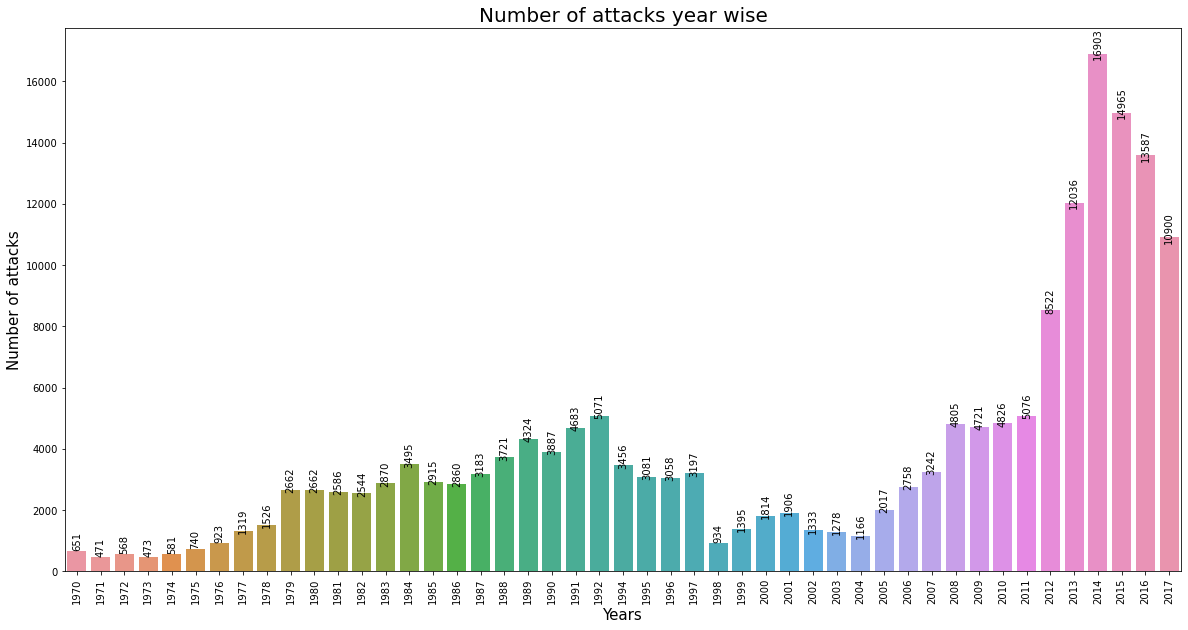

In [ ]:
#To find the number of attacks that happened every year

ax = sns.countplot(df1['iyear'])

plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)

plt.title("Number of attacks year wise",fontsize=20)
plt.xticks(rotation =90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)

plt.show()

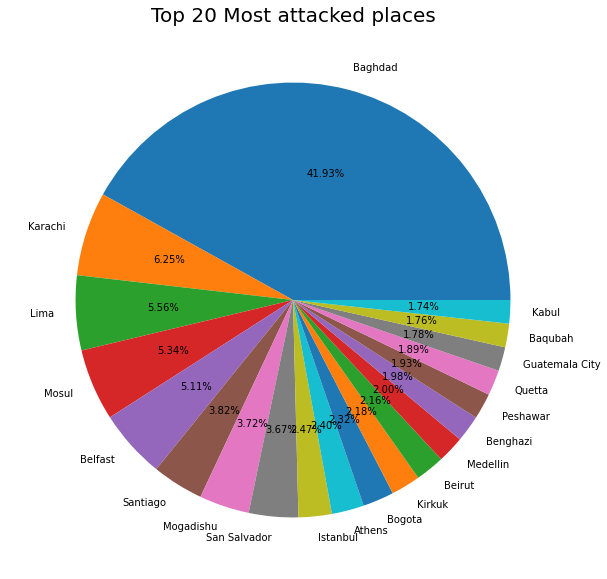

In [ ]:
df1['city'].value_counts().iloc[:20].plot(kind='pie',autopct='%0.2f%%')
plt.title("Top 20 Most attacked places",fontsize=20)
plt.ylabel(" ")
plt.show()

In [ ]:
df1['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

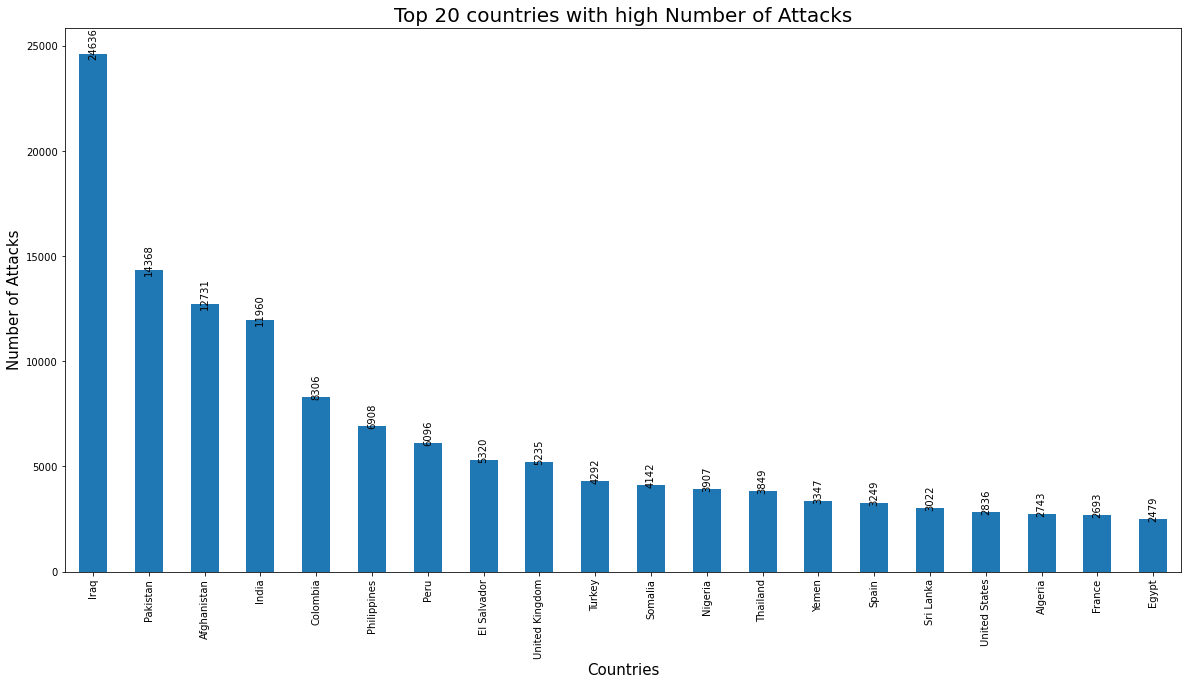

In [ ]:
ax = df1['country_txt'].value_counts().iloc[:20].plot(kind='bar')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)
    
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Top 20 countries with high Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'individual', 'nperps', 'nperpcap',
       'claimed', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
india = df1[df1['country_txt']=='India']

In [ ]:
india.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1186,1972,2,22,0,India,South Asia,Delhi,New Delhi,1.0,0,1,1,1,0.0,0.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Lufthansa,B-747,Germany,Palestinians,0,5.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Committee on Government Operations United Stat...,Hijacking DB,1,1,1,1
2764,1975,1,2,0,India,South Asia,Bihar,Samastipur,1.0,0,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,India,Ananda Marga,0,-99.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,"""Leaders of India Irate at Killing: Death of A...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0
3857,1976,5,26,0,India,South Asia,Delhi,New Delhi,1.0,0,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Airports & Aircraft,Airport,Not Applicable,New Delhi airport,India,Taliban,0,-99.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,0,-9
5327,1977,9,28,0,India,South Asia,Maharashtra,Bombay,1.0,0,1,1,1,0.0,0.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Japan Airlines,DC-8,Japan,Japanese Red Army (JRA),0,5.0,0.0,0.0,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Committee on Government Operations United Stat...,Hijacking DB,1,1,1,1
7337,1979,1,13,0,India,South Asia,Assam,Baghdad,4.0,0,1,1,1,-9.0,0.0,1,0,Armed Assault,Police,Police Patrol (including vehicles and convoys),Police,patrol,India,Naga People,0,-99.0,0.0,0.0,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0


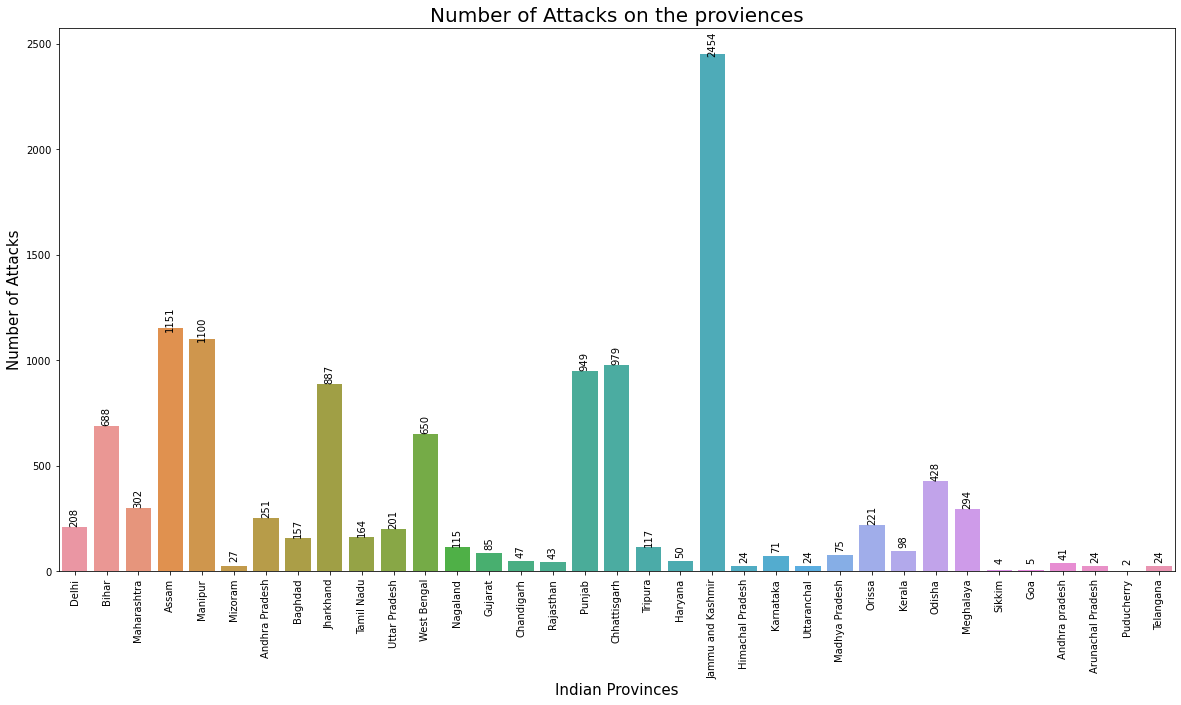

In [ ]:
ax = sns.countplot(india['provstate'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)

plt.xlabel('Indian Provinces',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Number of Attacks on the proviences',fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### Hotspots:
* From the above graph we can see that Jammu and Kashmir in India is the most favourite attack place of the terrorists.
* According to the data provided Assam and Manipur stans in 2nd and 3rd place afte jammu and kashmir.
* Puducherry being the least precided by Sikkim and Goa 

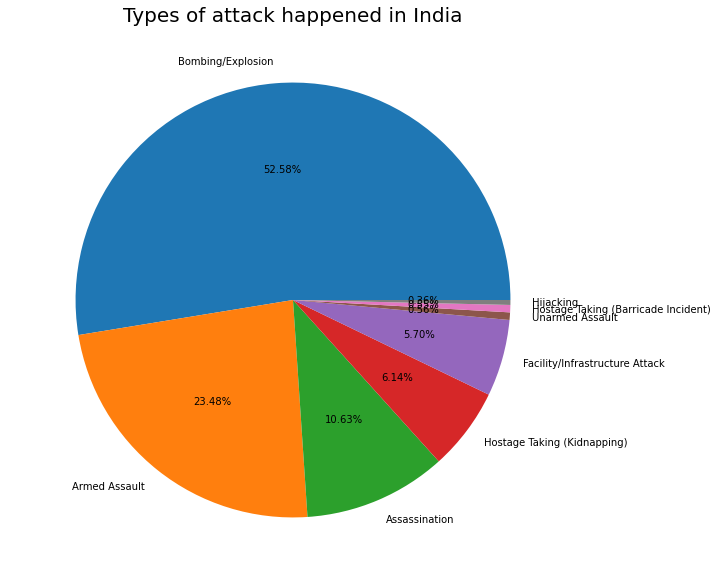

In [ ]:
df1['attacktype1_txt'].value_counts().plot(kind='pie',autopct="%0.2f%%")

plt.title("Types of attack happened in India",fontsize=20)
plt.ylabel(" ")
plt.show()

In [ ]:
df1.provstate.nunique()

2854

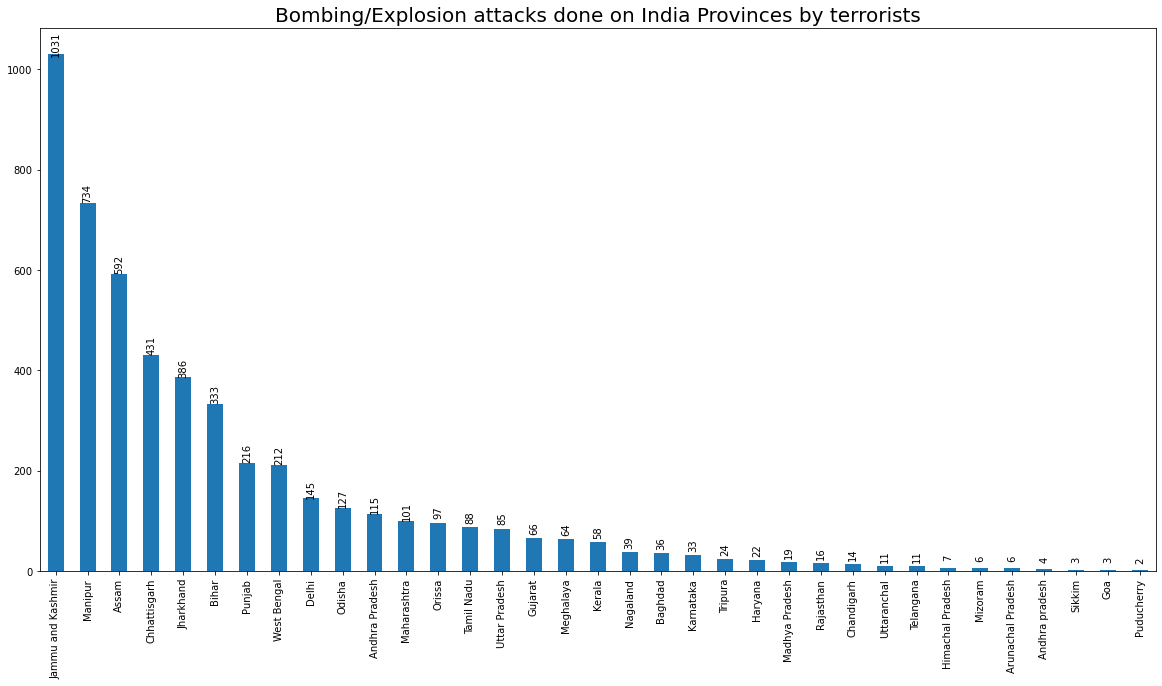

In [ ]:
ax = india[india['attacktype1_txt']=='Bombing/Explosion']['provstate'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)
    
plt.title("Bombing/Explosion attacks done on India Provinces by terrorists",fontsize=20)
plt.show()

In [ ]:
df1.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'individual', 'nperps', 'nperpcap',
       'claimed', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

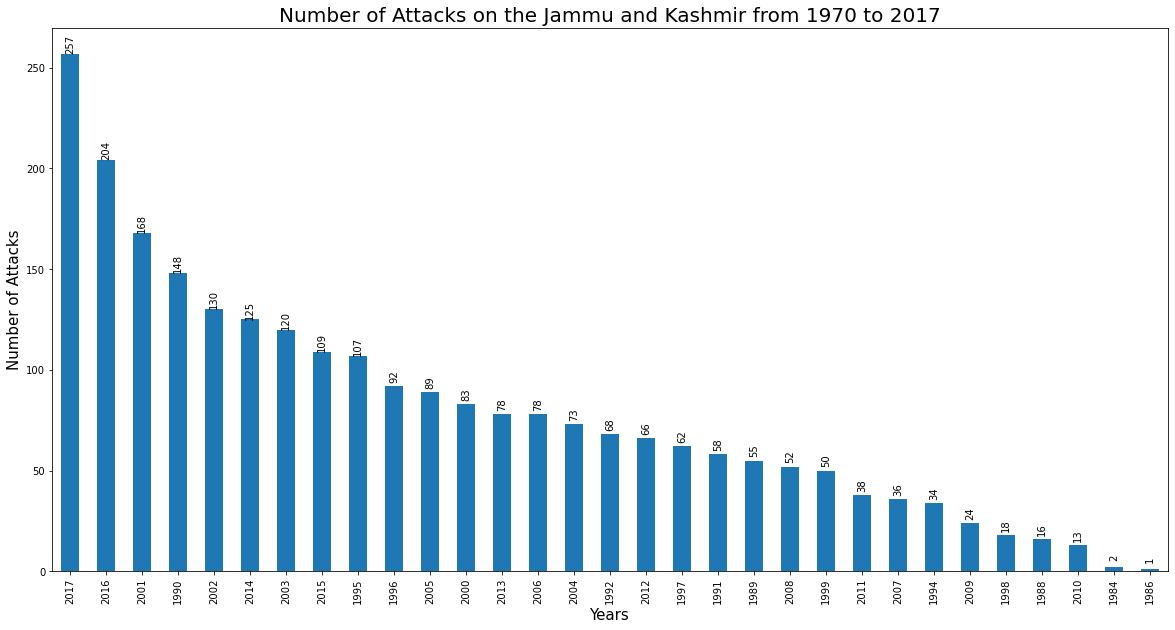

In [ ]:
ax = india[india['provstate']=='Jammu and Kashmir']['iyear'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)
    
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Number of Attacks on the Jammu and Kashmir from 1970 to 2017',fontsize=20)
plt.xticks(rotation=90)
plt.show()

* The graph states that the attack or aggression on Jammu and Kashmir has grown so much from the year 1970 to 2017

In [ ]:
df1['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

#### Looking into the state of Jammu and Kashmir

In [ ]:
jk = india[india['provstate']=='Jammu and Kashmir']
jk.shape

(2454, 46)

In [ ]:
jk.head(2)

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
21744,1984,4,17,0,India,South Asia,Jammu and Kashmir,Bhela,2.0,0,1,1,1,-9.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,local,Gurbachan Singh Sandhar (Sikh lawyer) and wife,India,Sikh Extremists,0,-99.0,0.0,0.0,Explosives,12.0,Unknown Explosive Type,Explosive,2.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0
22108,1984,5,20,0,India,South Asia,Jammu and Kashmir,Jammu,1.0,0,1,1,1,0.0,0.0,0,0,Bombing/Explosion,Transportation,Bridge/Car Tunnel,Not Applicable,bridge over a stream,India,Taliban,0,-99.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,Explosive,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,0,-9


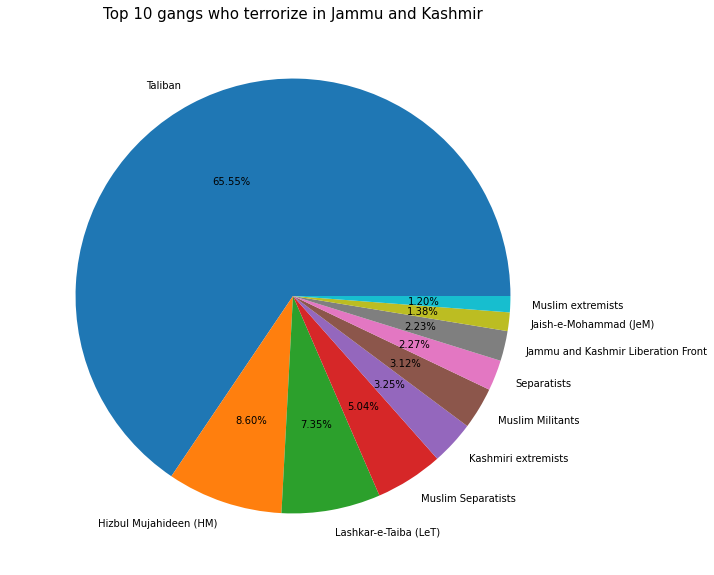

In [ ]:
jk['gname'].value_counts().iloc[:10].plot(kind='pie',autopct="%0.2f%%")

plt.title("Top 10 gangs who terrorize in Jammu and Kashmir",fontsize=15)
plt.ylabel(" ")
plt.show()

* About 65.55% of the attack is done by unknown gangs.
* These unknown gangs can be small packs of extremists in Jammu and Kashmir.  

<AxesSubplot:>

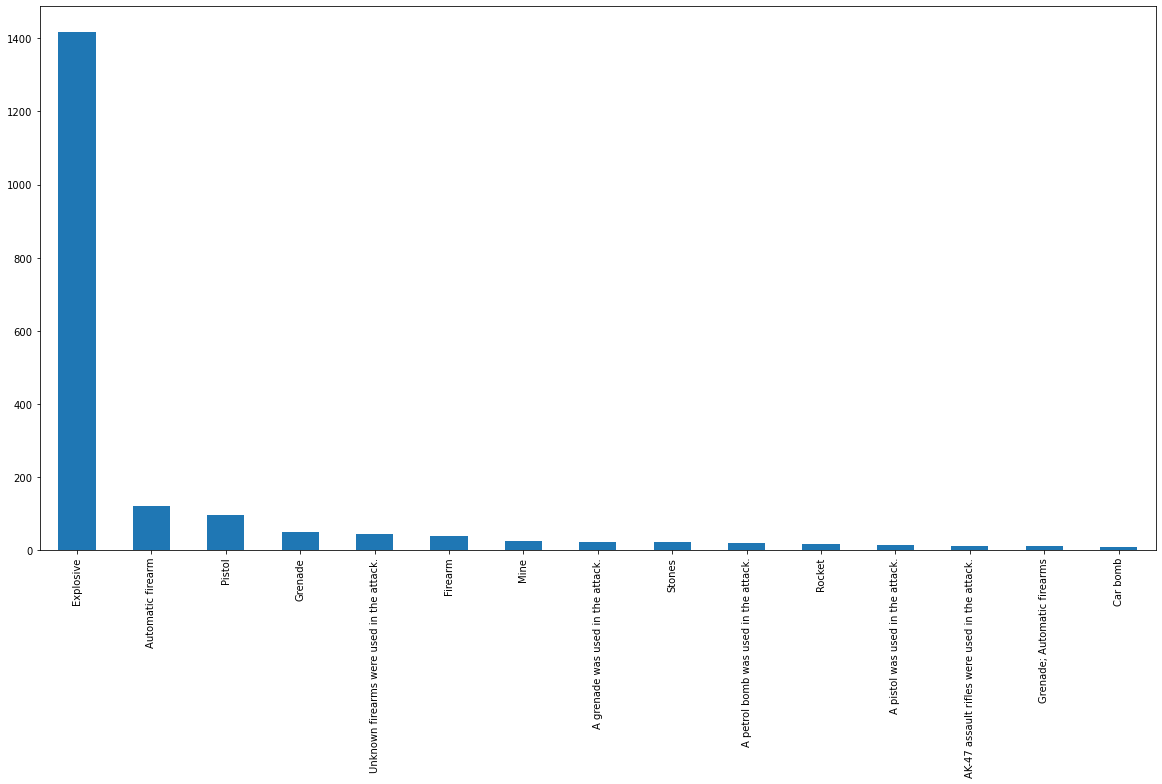

In [ ]:
jk['weapdetail'].value_counts().iloc[:15].plot(kind='bar')

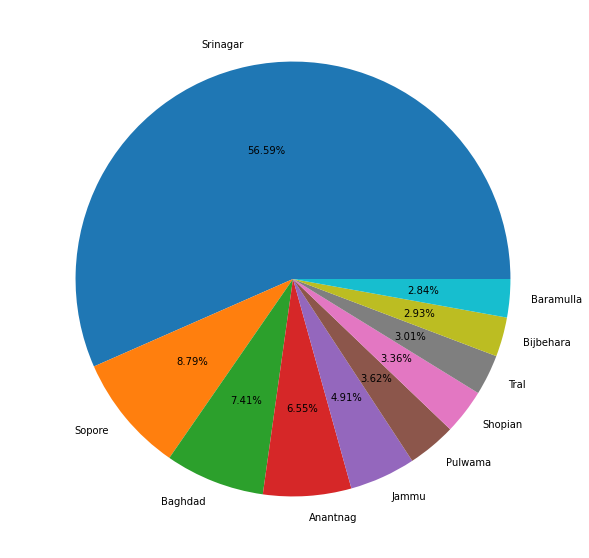

In [ ]:
jk['city'].value_counts().iloc[:10].plot(kind='pie',autopct="%0.2f%%")

plt.ylabel(" ")
plt.show()

* Srinagar is the main hot spot of attack in Jammu and Kashmir
* Sopore and Baghdad follows 2nd and 3rd. 

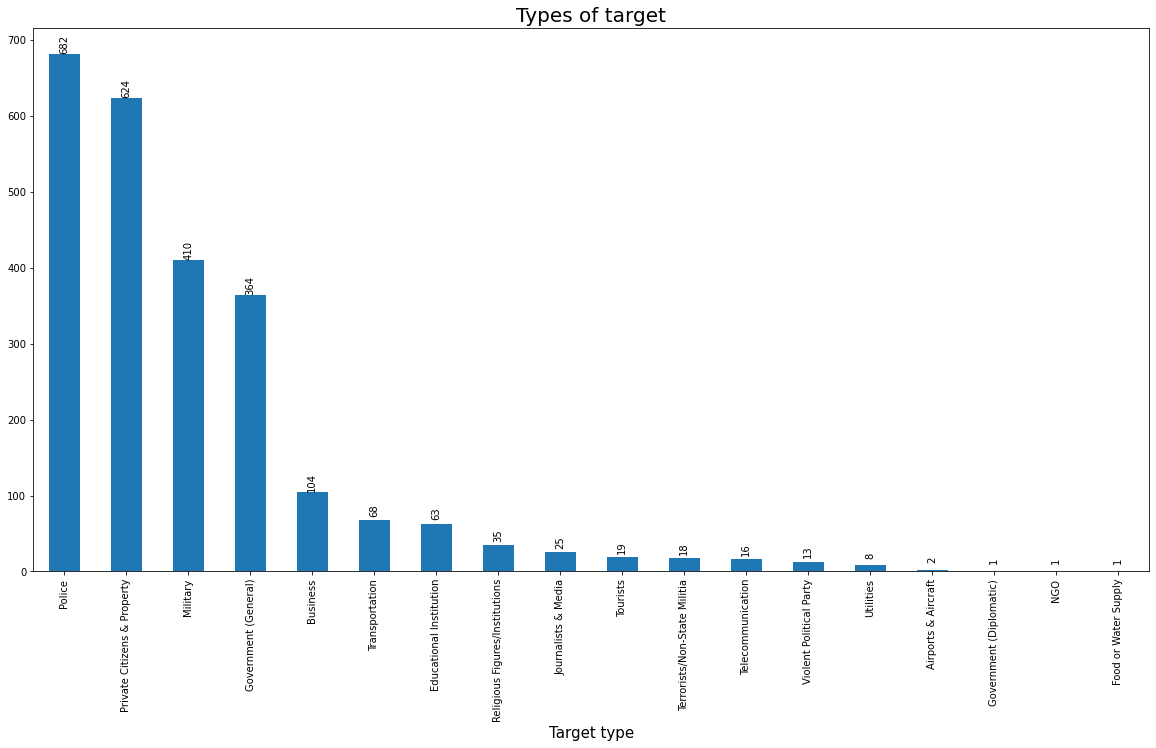

In [ ]:
ax = jk.targtype1_txt.value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)
    
plt.title("Types of target",fontsize=20)
plt.xlabel('Target type',fontsize=15)
plt.show()

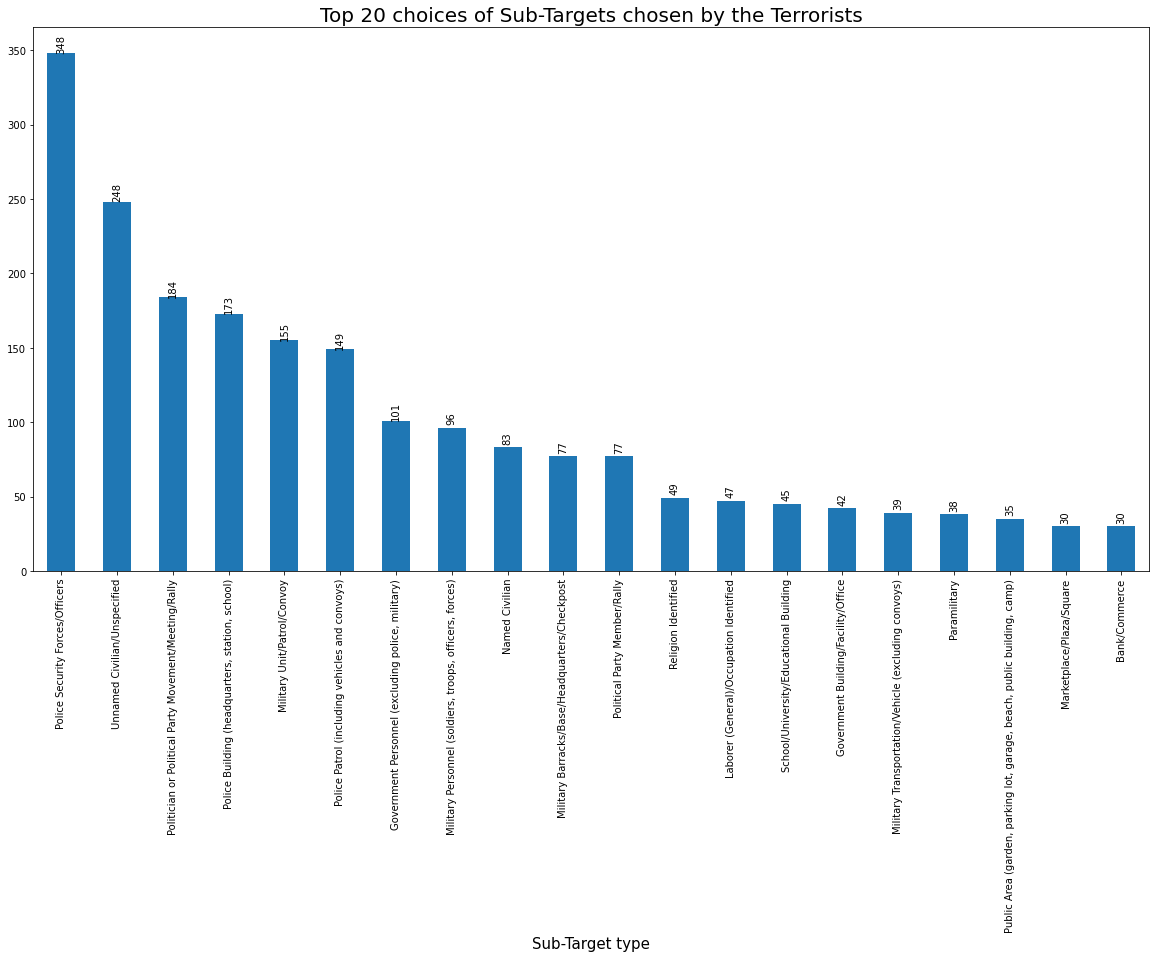

In [ ]:
ax = jk.targsubtype1_txt.value_counts().iloc[:20].plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=90)
    
plt.title("Top 20 choices of Sub-Targets chosen by the Terrorists",fontsize=20)
plt.xlabel('Sub-Target type',fontsize=15)
plt.show()